[0]	train-logloss:0.59830	eval-logloss:0.59829
[1]	train-logloss:0.52062	eval-logloss:0.52061
[2]	train-logloss:0.45583	eval-logloss:0.45581
[3]	train-logloss:0.40107	eval-logloss:0.40106
[4]	train-logloss:0.35430	eval-logloss:0.35429
[5]	train-logloss:0.32086	eval-logloss:0.32091
[6]	train-logloss:0.28500	eval-logloss:0.28505
[7]	train-logloss:0.25376	eval-logloss:0.25380
[8]	train-logloss:0.22641	eval-logloss:0.22645
[9]	train-logloss:0.20236	eval-logloss:0.20240
[10]	train-logloss:0.18114	eval-logloss:0.18118
[11]	train-logloss:0.16237	eval-logloss:0.16241
[12]	train-logloss:0.14812	eval-logloss:0.14815
[13]	train-logloss:0.13304	eval-logloss:0.13308
[14]	train-logloss:0.11960	eval-logloss:0.11965
[15]	train-logloss:0.10987	eval-logloss:0.10991
[16]	train-logloss:0.10084	eval-logloss:0.10088
[17]	train-logloss:0.09083	eval-logloss:0.09088
[18]	train-logloss:0.08187	eval-logloss:0.08193
[19]	train-logloss:0.07385	eval-logloss:0.07391
[20]	train-logloss:0.06665	eval-logloss:0.06672
[2

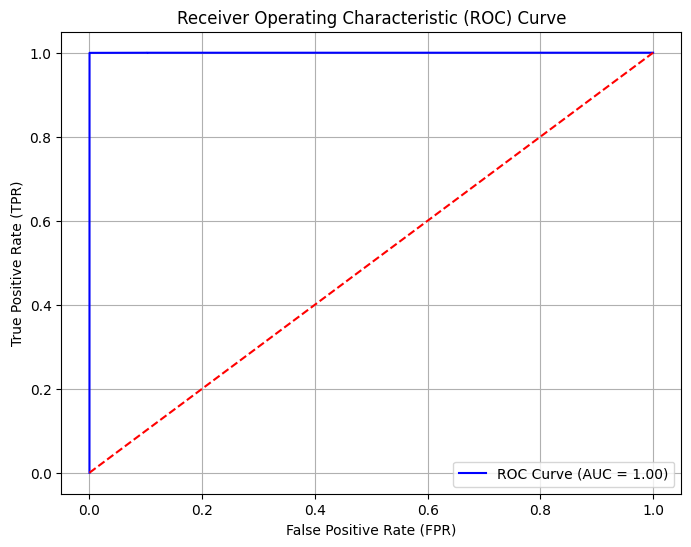

In [ ]:
import pandas as pd  # Import Pandas for data processing
import xgboost as xgb  # Import XGBoost library
from sklearn.model_selection import train_test_split  # Import function to split the dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve  # Import evaluation metrics
import matplotlib.pyplot as plt  # Import plotting library
from sklearn.metrics import classification_report

# 1. Load the data
data = pd.read_csv('cleaned_and_standardized_creditcard_2023.csv')  # Read credit card fraud dataset
X = data.drop('Class', axis=1)  # Feature data, drop the label column
y = data['Class']  # Label data, keep the fraud indicator

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% test

# 3. Calculate class weights
neg_class_count = sum(y == 0)  # Number of negative samples (normal transactions)
pos_class_count = sum(y == 1)  # Number of positive samples (fraudulent transactions)
scale_pos_weight = neg_class_count / pos_class_count  # Calculate weight for positive class

# 4. Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification task
    'eval_metric': 'logloss',  # Evaluation metric is log loss
    'max_depth': 5,  # Maximum tree depth
    'eta': 0.1,  # Learning rate
    'reg_lambda': 1,  # L2 regularization
    'reg_alpha': 0.1,  # L1 regularization
    'subsample': 0.8,  # Use 80% of data for training
    'colsample_bytree': 0.8,  # Use 80% of features for training
    'scale_pos_weight': scale_pos_weight,  # Set class weight
}

# 5. Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)  # Training data
dtest = xgb.DMatrix(X_test, label=y_test)  # Test data

# 6. Train the model with early stopping
evals = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10)

# 7. Model predictions
y_pred = model.predict(dtest)  # Make predictions on the test set
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# 8. Evaluate model performance
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
report = classification_report(y_test, y_pred_binary, output_dict=True)  # Get report as dictionary

# Format classification report to four decimal places
formatted_report = {}
for label, metrics in report.items():
    if isinstance(metrics, dict):  # Check if metrics is a dictionary
        formatted_report[label] = {metric: f"{v:.4f}" for metric, v in metrics.items()}
    else:
        formatted_report[label] = metrics  # Keep it as is for support, accuracy, etc.

# Print formatted classification report
for label, metrics in formatted_report.items():
    print(f"{label}: {metrics}")

# Print results
print("Confusion Matrix:")
print(conf_matrix)  # Print confusion matrix
print("\nClassification Report:")
for label, metrics in formatted_report.items():
    print(f"Label: {label}, Metrics: {metrics}")  # Print formatted classification report
print(f'\nModel Accuracy: {accuracy:.4f}')  # Output accuracy, rounded to four decimal places
print(f'ROC AUC: {roc_auc:.4f}')  # Output AUC value, rounded to four decimal places

# 9. Calculate and plot AUC-ROC curve
y_pred_proba = model.predict(dtest)  # Get predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Calculate false positive rate and true positive rate
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Calculate AUC value

plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot ROC curve
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Plot diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')  # X-axis label
plt.ylabel('True Positive Rate (TPR)')  # Y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Chart title
plt.legend(loc='lower right')  # Show legend
plt.grid()  # Add grid
plt.show()  # Display the plot
